In [1]:
import re
from scipy.stats import sem

def generateAverageAndStdTime(workerDataPath):
    with open('generatedData/' + workerDataPath) as f:
        lines = f.readlines()

        split = [re.split(' |\n', time)[0] for time in lines]
        getMin = [time[2:7] for time in split]
        replaceColon = [time.replace(':', '.') for time in getMin]
        allTimes = [float(time) for time in replaceColon]
        
        average = sum(allTimes) / len(allTimes)
        rounded = round(average, 5)
        
        std = sem(allTimes)
        
        return std, average

        

std, avg = generateAverageAndStdTime("duration_1_worker.txt")

In [2]:
std, avg = generateAverageAndStdTime("duration_1_worker.txt")
print(std)

0.1177833463044186


In [2]:
import math

def generateYAndStd(*paths):
    yList = []
    stdList = []
    for path in paths:
        std, avg = generateAverageAndStdTime(path)
        
        yList.append(avg)
        stdList.append(std)
    
    stdList = [10**-8 if math.isnan(x) else x for x in stdList]
    
    return stdList, yList

In [3]:
stdWeak, yWeak = generateYAndStd("duration_1_worker.txt", "duration_2_workers.txt", "duration_3_worker.txt")

# Workers
xWeak = [1, 2, 3]

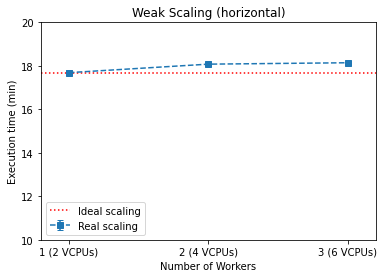

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.errorbar(xWeak, yWeak, stdWeak, linestyle='--', marker='s', capsize=3, label='Real scaling')
ax.axhline(y=yWeak[0], color='r', linestyle=':', label='Ideal scaling')
ax.legend(loc='lower left')

my_xticks = ['1 (2 VCPUs)','2 (4 VCPUs)','3 (6 VCPUs)']
plt.xticks(xWeak, my_xticks)
plt.axis([0.8, 3.2, 10, 20])


plt.xlabel("Number of Workers")
plt.ylabel("Execution time (min)")
plt.title("Weak Scaling (horizontal)")

plt.savefig('weak_scaling_truncated.png')
plt.show()

In [5]:
# Strong
xStrong = [2, 4, 8, 16]
stdStrong, yStrong = generateYAndStd("duration_1_worker.txt", "duration_strong_1_worker_v2.txt", "duration_strong_2_worker_v2.txt", "duration_strong_3_worker_v2.txt")

In [6]:
print(yStrong)

[17.6875, 10.35, 7.0775, 2.41]


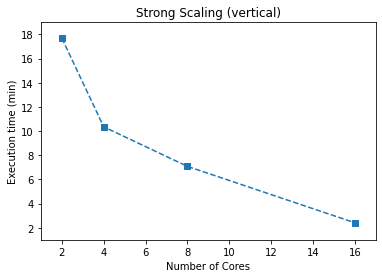

In [8]:
plt.errorbar(xStrong, yStrong, stdStrong, linestyle='--', marker='s', capsize=3)


#my_xticks = ['1 (2 VCPUs)', '1 (4 VCPUs)','1 (8 VCPUs)','1 (16 VCPUs)']
#plt.xticks(xStrong, my_xticks)
plt.axis([1, 17, 1, 19])

plt.xlabel("Number of Cores")
plt.ylabel("Execution time (min)")
plt.title("Strong Scaling (vertical)")


#plt.savefig('strong_scaling_new.png')
plt.show()